In [1]:
import pandas as pd
import seaborn as sns


# 0 - Exploring the NYC Yellow taxi data set

In this notebook, you will explore a small subset of the NYC Yellow Cab dataset from 2019. You have two goals:
- understand _what_ data is collected by Yellow Cab
- understand _how_ you can use this data in your own predictions

The next steps are 
- load the full data set in a [Dask dataframe]() on [Coiled]()
- get some statistics on users and drivers
- make a predictive model using ???

## Loading the Yellow Cab data

The `yellow_tripdata_2019-01_0-end-by-1000.csv` is $8760 \times 18$. It is a _small_ subset of the first comma separated value (csv) data set hosted on [Amazon Web Services](). You can use these data points to plot figures and do some initial data exploration. The first `Unnamed` column corresponds to the row taken from the original csv. 

> __Note__: This data was prepared by taking every 1,000$^{th}$ row of `s3://nyc-tlc/trip data/yellow_tripdata_2019-01.csv`. When you load the full Yellow Cab data set into a Dask dataframe, you will use all 8,759,874 in this file and all the other 2018 csv files. The steps to recreate this subset is as such
> ```python
> taxi = pd.read_csv("s3://nyc-tlc/trip data/yellow_tripdata_2019-01.csv")
> taxi.loc[0::1000, :].to_csv('yellow_tripdata_2018-01_0-end-by-1000.csv')
> ```

In [2]:
taxi_subset = pd.read_csv('./yellow_tripdata_2019-01_0-end-by-1000.csv')
taxi_subset

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1000,1,2018-01-01 00:16:51,2018-01-01 00:26:47,1,1.30,1,N,114,90,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30
2,2000,2,2018-01-01 00:22:20,2018-01-01 00:36:09,1,2.90,1,N,161,263,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30
3,3000,1,2018-01-01 00:57:07,2018-01-01 01:15:50,2,3.50,1,N,142,263,1,15.0,0.5,0.5,4.05,0.0,0.3,20.35
4,4000,1,2018-01-01 00:30:04,2018-01-01 00:40:11,1,1.20,1,N,158,186,1,8.0,0.5,0.5,2.00,0.0,0.3,11.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755000,2,2018-01-31 23:39:54,2018-01-31 23:48:26,1,2.35,1,N,68,45,1,9.5,0.5,0.5,2.70,0.0,0.3,13.50
8756,8756000,2,2018-01-31 23:06:02,2018-01-31 23:09:34,1,0.74,1,N,65,97,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
8757,8757000,2,2018-01-31 23:08:04,2018-01-31 23:23:19,1,3.01,1,N,161,158,1,12.0,0.5,0.5,2.66,0.0,0.3,15.96
8758,8758000,1,2018-01-31 23:23:00,2018-01-31 23:31:15,1,1.80,1,N,162,113,1,8.5,0.5,0.5,1.96,0.0,0.3,11.76


## Exploring the Yellow Cab data set

The data set is now stored in a Pandas dataframe, `taxi_subset`. You can troubleshoot and explore the data to understand _what_ data is collected. First, look at the column names as such

In [3]:
taxi_subset.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

### What data is in the Yellow Cab data set?

Each row corresponds to one Yellow Cab trip in this data set. For each trip, there are 18 recorded values:
- ` Unnamed: 0 `: row number from the original data set
- `VendorID`: A code indicating the TPEP provider that provided the record.
1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
- `tpep_pickup_datetime`: The date and time when the meter was engaged.
- `tpep_dropoff_datetime`: The date and time when the meter was disengaged.
- `Passenger_count`: The number of passengers in the vehicle.
This is a driver-entered value.
- `Trip_distance`: The elapsed trip distance in miles reported by the taximeter.
- `PULocationID`: TLC Taxi Zone in which the taximeter was engaged
- `DOLocationID`: TLC Taxi Zone in which the taximeter was disengaged
- `RateCodeID`: The final rate code in effect at the end of the trip.
1= Standard rate
2=JFK
3=Newark
4=Nassau or Westchester
5=Negotiated fare
6=Group ride
- `Store_and_fwd_flag`: This flag indicates whether the trip record was held in vehicle
memory before sending to the vendor, aka “store and forward,”
because the vehicle did not have a connection to the server.
Y= store and forward trip
N= not a store and forward trip
- `Payment_type`: A numeric code signifying how the passenger paid for the trip.
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip
- `Fare_amount`: The time-and-distance fare calculated by the meter.
Extra Miscellaneous extras and surcharges. Currently, this only includes
the $\$0.50$ and $\$1$ rush hour and overnight charges.
- `MTA_tax`: \$0.50 MTA tax that is automatically triggered based on the metered
rate in use.
- `Improvement_surcharge`: \$0.30 improvement surcharge assessed trips at the flag drop. The
improvement surcharge began being levied in 2015.
- `Tip_amount`: Tip amount – This field is automatically populated for credit card
tips. Cash tips are not included.
- `Tolls_amount`: Total amount of all tolls paid in trip.
- `Total_amount`: The total amount charged to passengers. Does not include cash tips.

> __Note__: The data descriptions are provided in this [Yellow Cab pdf](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

### How can you use the Yellow Cab data set?

There are a number of statistics and models you can use to describe the data or predict new data points. For example, a Yellow Cab driver may want to maximize tips over the course of a work day. The `tip_amount` would be the dependent variable in your models. You can create statistics that relate distance travelled, fares, number of passengers, etc. to `tip_amount`. 

If you are interested in `tip_amount`, consider 2 variables to start:
- `trip_distance` 
- `fare_amount`

One model, might be that longer trips and higher fares should result in higher tips. Start with a [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to see the correlation between these three variables, 

- `tip_amount`
- `trip_distance` 
- `fare_amount`



Text(0.5, 1.05, 'Pair plots for tips, distance, and fares')

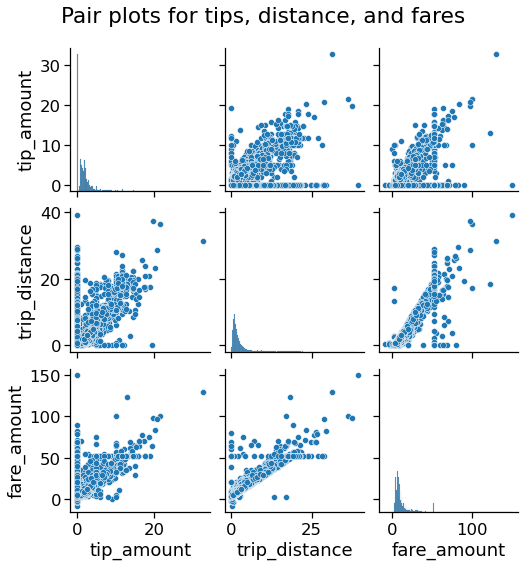

In [4]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
f = sns.pairplot(taxi_subset[['tip_amount', 'trip_distance', 'fare_amount']])
f.fig.suptitle(r'Pair plots for tips, distance, and fares', y=1.05)

In this pairplot, you see 
- histograms on the diagonal for each variable: `tip_amount`, `trip_distance`, and `fare_amount`
- scatter plots relating `tip_amount`, `trip_distance`, and `fare_amount` on the x-axis in the first, second third columns, respectively and on the y-axis on the first, second, third rows, respectively


The histogram for `tip_amount` has many occurrences of $0. These could be unrecorded tips or cases where the passenger did not tip at all. There is no way to separate these two cases, so you can ignore `tip_amount <= 0`. Similarly, you can ignore `trip_distance <= 0` and `fare_amount <= 0`. 


In [52]:
taxi_tips = taxi_subset[(taxi_subset['tip_amount'] > 0) & 
                        (taxi_subset['fare_amount'] > 0) & 
                        (taxi_subset['trip_distance'] > 0)]
taxi_tips

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
3,3000,1,2018-01-01 00:57:07,2018-01-01 01:15:50,2,3.50,1,N,142,263,1,15.0,0.5,0.5,4.05,0.0,0.3,20.35
4,4000,1,2018-01-01 00:30:04,2018-01-01 00:40:11,1,1.20,1,N,158,186,1,8.0,0.5,0.5,2.00,0.0,0.3,11.30
6,6000,1,2018-01-01 00:31:46,2018-01-01 00:34:07,1,0.50,1,N,263,141,1,4.0,0.5,0.5,1.05,0.0,0.3,6.35
9,9000,1,2018-01-01 00:28:45,2018-01-01 00:35:34,1,1.90,1,N,43,75,1,8.0,0.5,0.5,1.00,0.0,0.3,10.30
11,11000,2,2018-01-01 00:07:11,2018-01-01 00:08:46,1,0.33,1,N,229,229,1,3.5,0.5,0.5,0.96,0.0,0.3,5.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,8754000,1,2018-01-31 23:50:41,2018-02-01 00:01:39,1,3.10,1,N,249,50,1,12.0,0.5,0.5,2.66,0.0,0.3,15.96
8755,8755000,2,2018-01-31 23:39:54,2018-01-31 23:48:26,1,2.35,1,N,68,45,1,9.5,0.5,0.5,2.70,0.0,0.3,13.50
8757,8757000,2,2018-01-31 23:08:04,2018-01-31 23:23:19,1,3.01,1,N,161,158,1,12.0,0.5,0.5,2.66,0.0,0.3,15.96
8758,8758000,1,2018-01-31 23:23:00,2018-01-31 23:31:15,1,1.80,1,N,162,113,1,8.5,0.5,0.5,1.96,0.0,0.3,11.76


### Pair plot for non-zero tips, fares, and distances

Below, you create another pair plot to look at correlations between the nonzero tips, fares, and distances. 

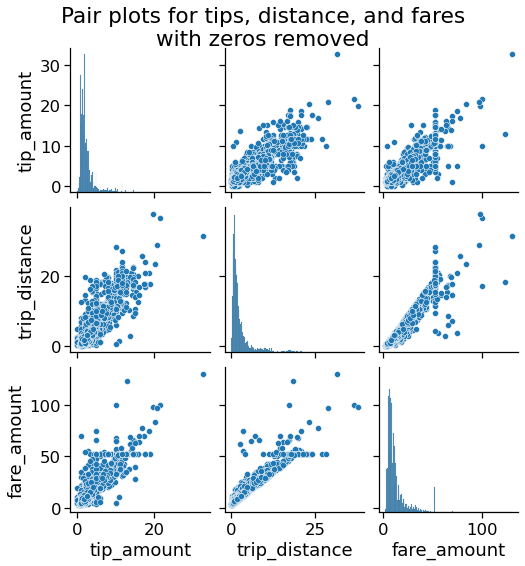

In [56]:
f = sns.pairplot(taxi_tips[['tip_amount', 'trip_distance', 'fare_amount']])
f.fig.suptitle('Pair plots for tips, distance, and fares\nwith zeros removed', y=1.05);

## Studying the trends in this subset

The distribution of data for tips, distance, and fares do not follow a normal distribution. This can make statistics such as mean and standard deviation misleading. One simple analysis you can try on the data is to assume it is normally distributed on a log-scale. This is a _very approximate_ assumption that is used in some financial models e.g. [Black and Scholes 1973](https://www.journals.uchicago.edu/doi/10.1086/260062). 

To visually check the distribution on a log-scale, you 
1. `apply` a logarithm function to the dataframe
2. replot the pair plot such that each variable has been scaled by [`np.log10`](https://numpy.org/doc/stable/reference/generated/numpy.log10.html)

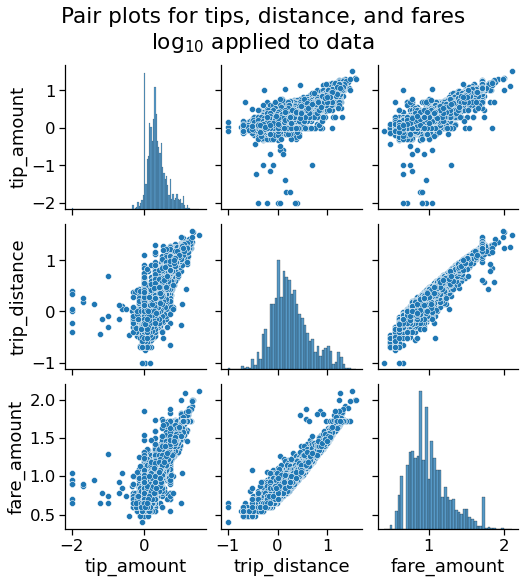

In [66]:
import numpy as np

lognormal = lambda x: np.log10(x)

f = sns.pairplot(taxi_tips[['tip_amount', 'trip_distance', 'fare_amount']].apply(lognormal))
f.fig.suptitle('Pair plots for tips, distance, and fares\n'+r'$\log_{10}$ applied to data', y=1.08);

Now, the histograms also look closer to a normal distribution on a log-scale. You can use  statistics of the full data frame with confidence that the data are normally distributed on a log scale, referencing the [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution). 

## Wrapping up

In this notebook, you 

- loaded a subset of the NYC Yellow Cab taxi data set
- explored and defined the data structure
- identified some variables that may be interesting for further analysis
- used Seaborn's `pairplots` to look for trends between trip distances, fare amounts, and tip amounts
- applied NumPy's `log10` to a dataframe to check for log-normal distributions in the data

Next step is to do some initial data analysis with Coiled cloud. 